#### Importing necessary libraries 

In [1]:
import pandas as pd
from sqlalchemy import create_engine

Creating an engine element to connect to database

In [2]:
engine=create_engine('sqlite:///D:\Yash\Learning material\EXL eDART\SQL\Hands--on\\SQLML.db')

Finding out how many tables are there in our database

In [3]:
table_names=engine.table_names()
print(table_names)

['BirthRate', 'LifeExp', 'dengue', 'epi', 'gdp', 'ml2', 'population']


Establishing a connection

In [4]:
con=engine.connect()

Executing a SQL query and saving the result in a DataFrame named df5

In [5]:
# Executing complex query
df5=pd.read_sql_query("SELECT LifeExp.country, LifeExp.LifeExpectancy, population.area, population.popdensity, population.population, epi.EPI, dengue.DengueCases, BirthRate.BirthRate, GDP.gdp FROM LifeExp \
LEFT JOIN population ON LifeExp.country= population.country \
LEFT JOIN epi ON LifeExp.country=epi.country \
LEFT JOIN dengue ON LifeExp.country= dengue.country \
LEFT JOIN BirthRate ON LifeExp.country= BirthRate.country \
LEFT JOIN gdp ON LifeExp.country= gdp.contry", engine)
df5.head()

,country,LifeExpectancy,area,popdensity,population,EPI,DengueCases,BirthRate,GDP
0,Hong Kong,84.7,2755.0,0.0,7024200.0,NaN,None,NaN,372989.0
1,Japan,84.5,377972.0,339.0,128056000.0,74.69,None,8.0,5154475.0
2,Singapore,83.8,721.5,0.0,5076700.0,64.23,"5,103",9.0,362818.0
3,Switzerland,83.6,41285.0,0.0,7785806.0,87.42,None,11.0,715360.0
4,Italy,83.4,301338.0,200.0,60340328.0,76.96,None,8.0,1988636.0


Finding out about the information contained in our result data frame

In [6]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   area            151 non-null    float64
 3   popdensity      174 non-null    float64
 4   population      174 non-null    float64
 5   EPI             171 non-null    float64
 6   DengueCases     34 non-null     object 
 7   BirthRate       179 non-null    float64
 8   GDP             176 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.6+ KB


Deleting 'DengueCases' column from df5, as most rows in that col. are null values

In [7]:
df=df5.drop(['DengueCases'], axis=1) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   area            151 non-null    float64
 3   popdensity      174 non-null    float64
 4   population      174 non-null    float64
 5   EPI             171 non-null    float64
 6   BirthRate       179 non-null    float64
 7   GDP             176 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB


Finding the median value of 'area' column so that we can replace null values with it

In [9]:
fill_val = df['area'].median()
fill_val

274200.0

In [10]:
df['area'].fillna(fill_val,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   area            191 non-null    float64
 3   popdensity      174 non-null    float64
 4   population      174 non-null    float64
 5   EPI             171 non-null    float64
 6   BirthRate       179 non-null    float64
 7   GDP             176 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB


In [11]:
# Applying the same to the rest of cols.
df['popdensity'].fillna(df['popdensity'].median(), inplace=True)
df['population'].fillna(df['population'].median(), inplace=True)
df['EPI'].fillna(df['EPI'].median(), inplace=True)
df['BirthRate'].fillna(df['BirthRate'].median(), inplace=True)
df['GDP'].fillna(df['GDP'].median(), inplace=True)

In [12]:
#Having a look at top 5  rows in the modified dataframe
df.head()

,country,LifeExpectancy,area,popdensity,population,EPI,BirthRate,GDP
0,Hong Kong,84.7,2755.0,0.0,7024200.0,55.98,19.0,372989.0
1,Japan,84.5,377972.0,339.0,128056000.0,74.69,8.0,5154475.0
2,Singapore,83.8,721.5,0.0,5076700.0,64.23,9.0,362818.0
3,Switzerland,83.6,41285.0,0.0,7785806.0,87.42,11.0,715360.0
4,Italy,83.4,301338.0,200.0,60340328.0,76.96,8.0,1988636.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         191 non-null    object 
 1   LifeExpectancy  191 non-null    float64
 2   area            191 non-null    float64
 3   popdensity      191 non-null    float64
 4   population      191 non-null    float64
 5   EPI             191 non-null    float64
 6   BirthRate       191 non-null    float64
 7   GDP             191 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB


## Checking if any column has 0 as a value

In [14]:
df[df['LifeExpectancy']==0].value_counts()

Series([], dtype: int64)

In [15]:
df[df['area']==0].value_counts()

Series([], dtype: int64)

In [16]:
df[df['popdensity']==0].value_counts()

country      LifeExpectancy  area      popdensity  population  EPI    BirthRate  GDP     
Zimbabwe     61.2            390757.0  0.0         12644041.0  43.41  33.0       12818.0     1
Grenada      72.4            274200.0  0.0         109553.0    50.93  19.0       1238.0      1
Ghana        63.8            239567.0  0.0         24223431.0  49.66  31.0       67077.0     1
Georgia      73.6            69700.0   0.0         4436391.0   55.69  13.0       15925.0     1
Gambia       61.7            10689.0   0.0         1750732.0   42.42  39.0       1773.0      1
                                                                                            ..
Nicaragua    74.3            130375.0  0.0         5822265.0   55.04  20.0       12528.0     1
New Zealand  82.1            268021.0  0.0         4367800.0   75.96  13.0       204671.0    1
Netherlands  82.1            41543.0   0.0         16574989.0  75.46  10.0       902355.0    1
Nepal        70.5            147181.0  0.0         2804

**This means that 'popdensity' column has 148 enteries as 0**

In [17]:
df[df['population']==0].value_counts()

Series([], dtype: int64)

In [18]:
df[df['EPI']==0].value_counts()

Series([], dtype: int64)

In [19]:
df[df['BirthRate']==0].value_counts()

Series([], dtype: int64)

In [20]:
df[df['GDP']==0].value_counts()

Series([], dtype: int64)

#### Importing other libraries for data analysis and visualization

In [21]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [22]:
#Finding correlation between various numeric cols
df.corr()

,LifeExpectancy,area,popdensity,population,EPI,BirthRate,GDP
LifeExpectancy,1.000000,0.068540,0.090865,0.006521,0.740283,-0.832817,0.193455
area,0.068540,1.000000,0.070437,0.440099,0.008391,-0.094214,0.549283
popdensity,0.090865,0.070437,1.000000,0.433983,-0.106868,-0.123275,0.204724
population,0.006521,0.440099,0.433983,1.000000,-0.200500,-0.074285,0.548048
EPI,0.740283,0.008391,-0.106868,-0.200500,1.000000,-0.661552,0.094962
BirthRate,-0.832817,-0.094214,-0.123275,-0.074285,-0.661552,1.000000,-0.196492
GDP,0.193455,0.549283,0.204724,0.548048,0.094962,-0.196492,1.000000


<AxesSubplot:>

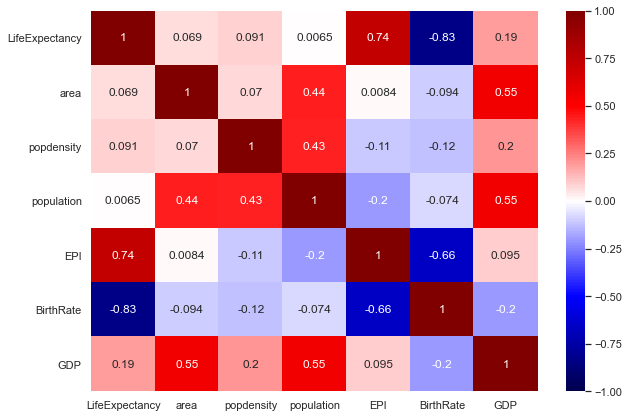

In [23]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

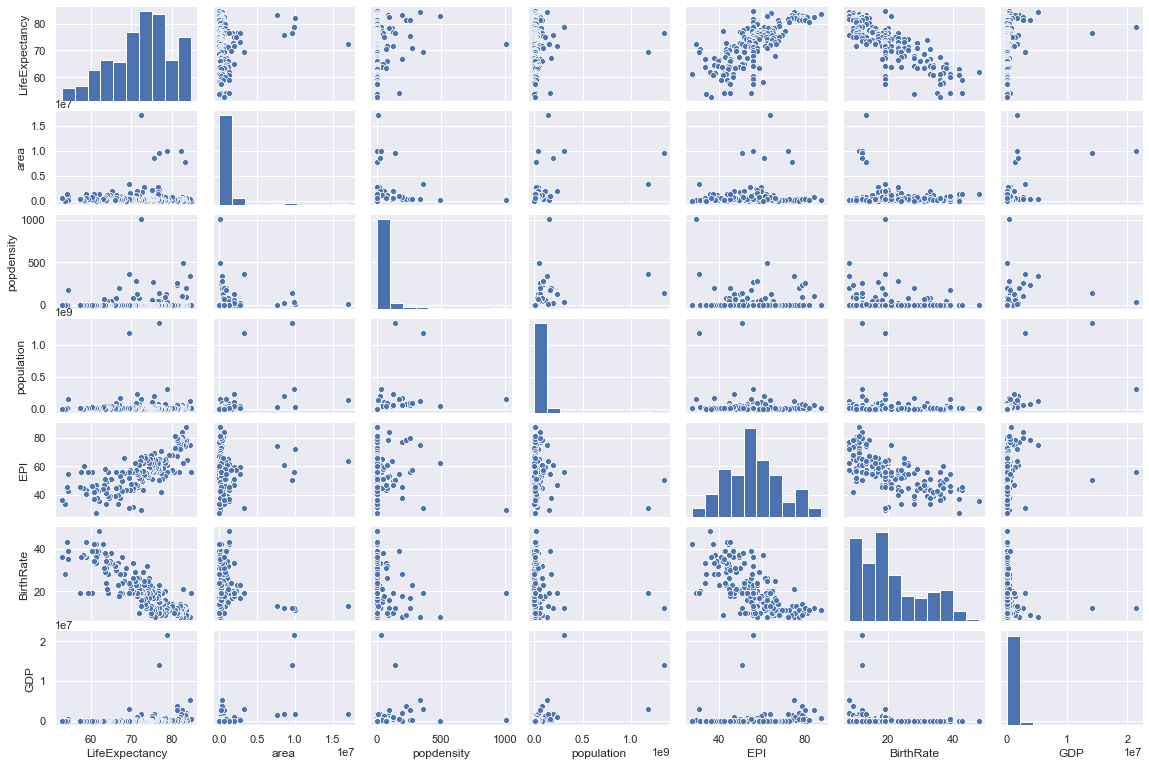

In [24]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.5, aspect=1.5);

In [25]:
#Again checking popdensity col. for 0 values
df[df['popdensity']==0].count()

country           148
LifeExpectancy    148
area              148
popdensity        148
population        148
EPI               148
BirthRate         148
GDP               148
dtype: int64

So there are 148 rows having 0 value as pop density

total no of rows = 191

So comparatively 148 is a bigger number

So we must drop these rows in order to have a legitimate data

New number of rows should be -- 191-148 = 43

In [26]:
#Deleting these rows
df = df[df['popdensity']!=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 186
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         43 non-null     object 
 1   LifeExpectancy  43 non-null     float64
 2   area            43 non-null     float64
 3   popdensity      43 non-null     float64
 4   population      43 non-null     float64
 5   EPI             43 non-null     float64
 6   BirthRate       43 non-null     float64
 7   GDP             43 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.0+ KB


In [27]:
# Apply Log transformation to all the features
df['BirthRate'] = np.log( df['BirthRate'] )
df['EPI'] = np.log( df['EPI'] )
df['population'] = np.log( df['population'] )
df['area'] = np.log( df['area'] )
df['popdensity'] = np.log( df['popdensity'] )
df['GDP'] = np.log( df['GDP'] )

***Note: 
If any column had 0 values then performing .log() function on it would have returned error***
    
Because: log(0)=-infinity

<AxesSubplot:>

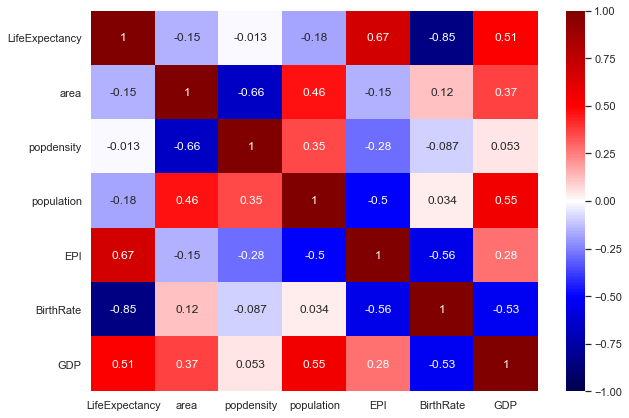

In [28]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

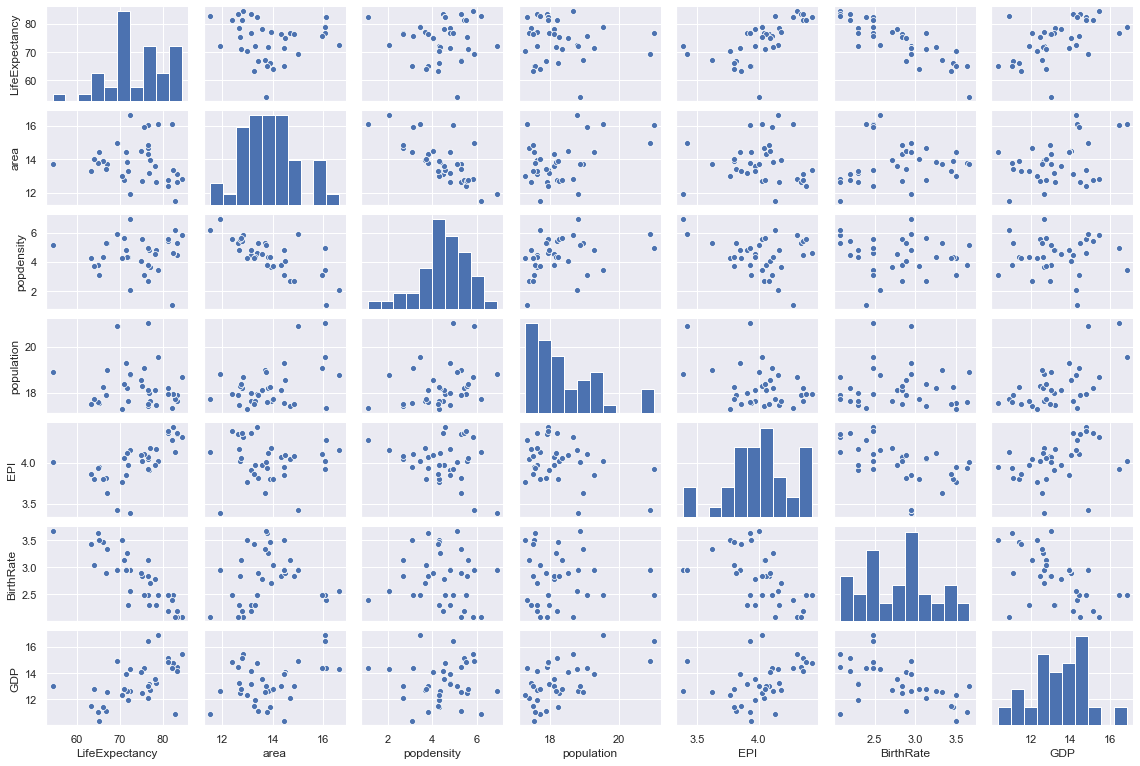

In [29]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.5, aspect=1.5);

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [31]:
df.shape

(43, 8)

In [32]:
df=df.dropna()

In [33]:
model = LinearRegression()
X = df[ ['area', 'popdensity', 'population', 'EPI', 'BirthRate', 'GDP'] ]
y = df[ ['LifeExpectancy'] ]
# Fit the model to the full dataset
model.fit(X, y)
# Print out the R^2 for the model against the full dataset
print(model.score(X, y))
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)

0.8099245198138427
[108.30190699]
[[-5.18759154 -4.77952674  3.16826516  2.74293757 -9.50038049  1.24894093]]


## Interpretation: 
Life expectancy of a country is higher for smaller countries having higher EPI and low birth rate